# Visualising FITS and star positions

## Import modules

In [48]:
import requests, math, glob
import numpy as np
from astropy.stats import mad_std
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u
from astropy.coordinates import Angle
import matplotlib.pyplot as plt
from photutils import aperture_photometry, CircularAperture
from pathlib import Path
import re
warnings.filterwarnings('ignore')
from pathlib import Path
import os
os.chdir('/home/jovyan/work/src')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Set reference frame, global vars

In [49]:
fits_file = '../results/WWCrA#30V_000452143_FLAT.fit'
vastdir = '../inputfiles/ASASSN-V_J060000.76-310027.83/vast/2019_1_bestaper'
fitsdir  = '../inputfiles/ASASSN-V_J060000.76-310027.83/cleaned/2019'
PADDING = 200


In [50]:
def getWcs(wcs_file):
    hdulist = fits.open(wcs_file)
    data = hdulist[0].data.astype(float)
    header = hdulist[0].header
    wcs = WCS(header)
    return wcs

wcs = getWcs(fits_file)

# get the mapping fits file -> rotation
def extract_frame_rotation_dict(vastdir) -> float:
    filename = Path(vastdir, 'vast_image_details.log')
    the_regex = re.compile(r'^.*rotation=\s*([0-9,.,-]+).*\s+(.+)$')
    rotation_dict = {}
    with open(filename, 'r') as infile:
        for line in infile:
            thesearch = the_regex.search(line)
            if thesearch:
                path = Path(thesearch.group(2))
                rotation_dict[path.name] = float(thesearch.group(1).strip())
    return rotation_dict

# make a dict with mapping fits file -> image00007.cat
def extract_image_catalog(vastdir) -> float:
    filename = Path(vastdir, 'vast_images_catalogs.log')
    the_regex = re.compile(r'^(.*) (.*)$')
    catalog_dict = {}
    with open(filename, 'r') as infile:
        for line in infile:
            thesearch = the_regex.search(line)
            if thesearch:
                path = Path(thesearch.group(2))
                catalog_dict[path.name] = thesearch.group(1)
    return catalog_dict

df = reading.read_lightcurve_vast(star.path)


rotation_dict = extract_frame_rotation_dict(vastdir)
# not needed, will read the .dat file directly
catalog_dict = extract_image_catalog(vastdir) 
print("rotation dict has", len(rotation_dict), "entries")
print("catalog dict has", len(catalog_dict), "entries")

rotation dict has 749 entries
catalog dict has 749 entries


## Get comparison Star

In [58]:
print(wcs.pixel_shape)

(1365, 1365)


There are 749 fits files
There are 749 matched rotations
data shape (1365, 1365)


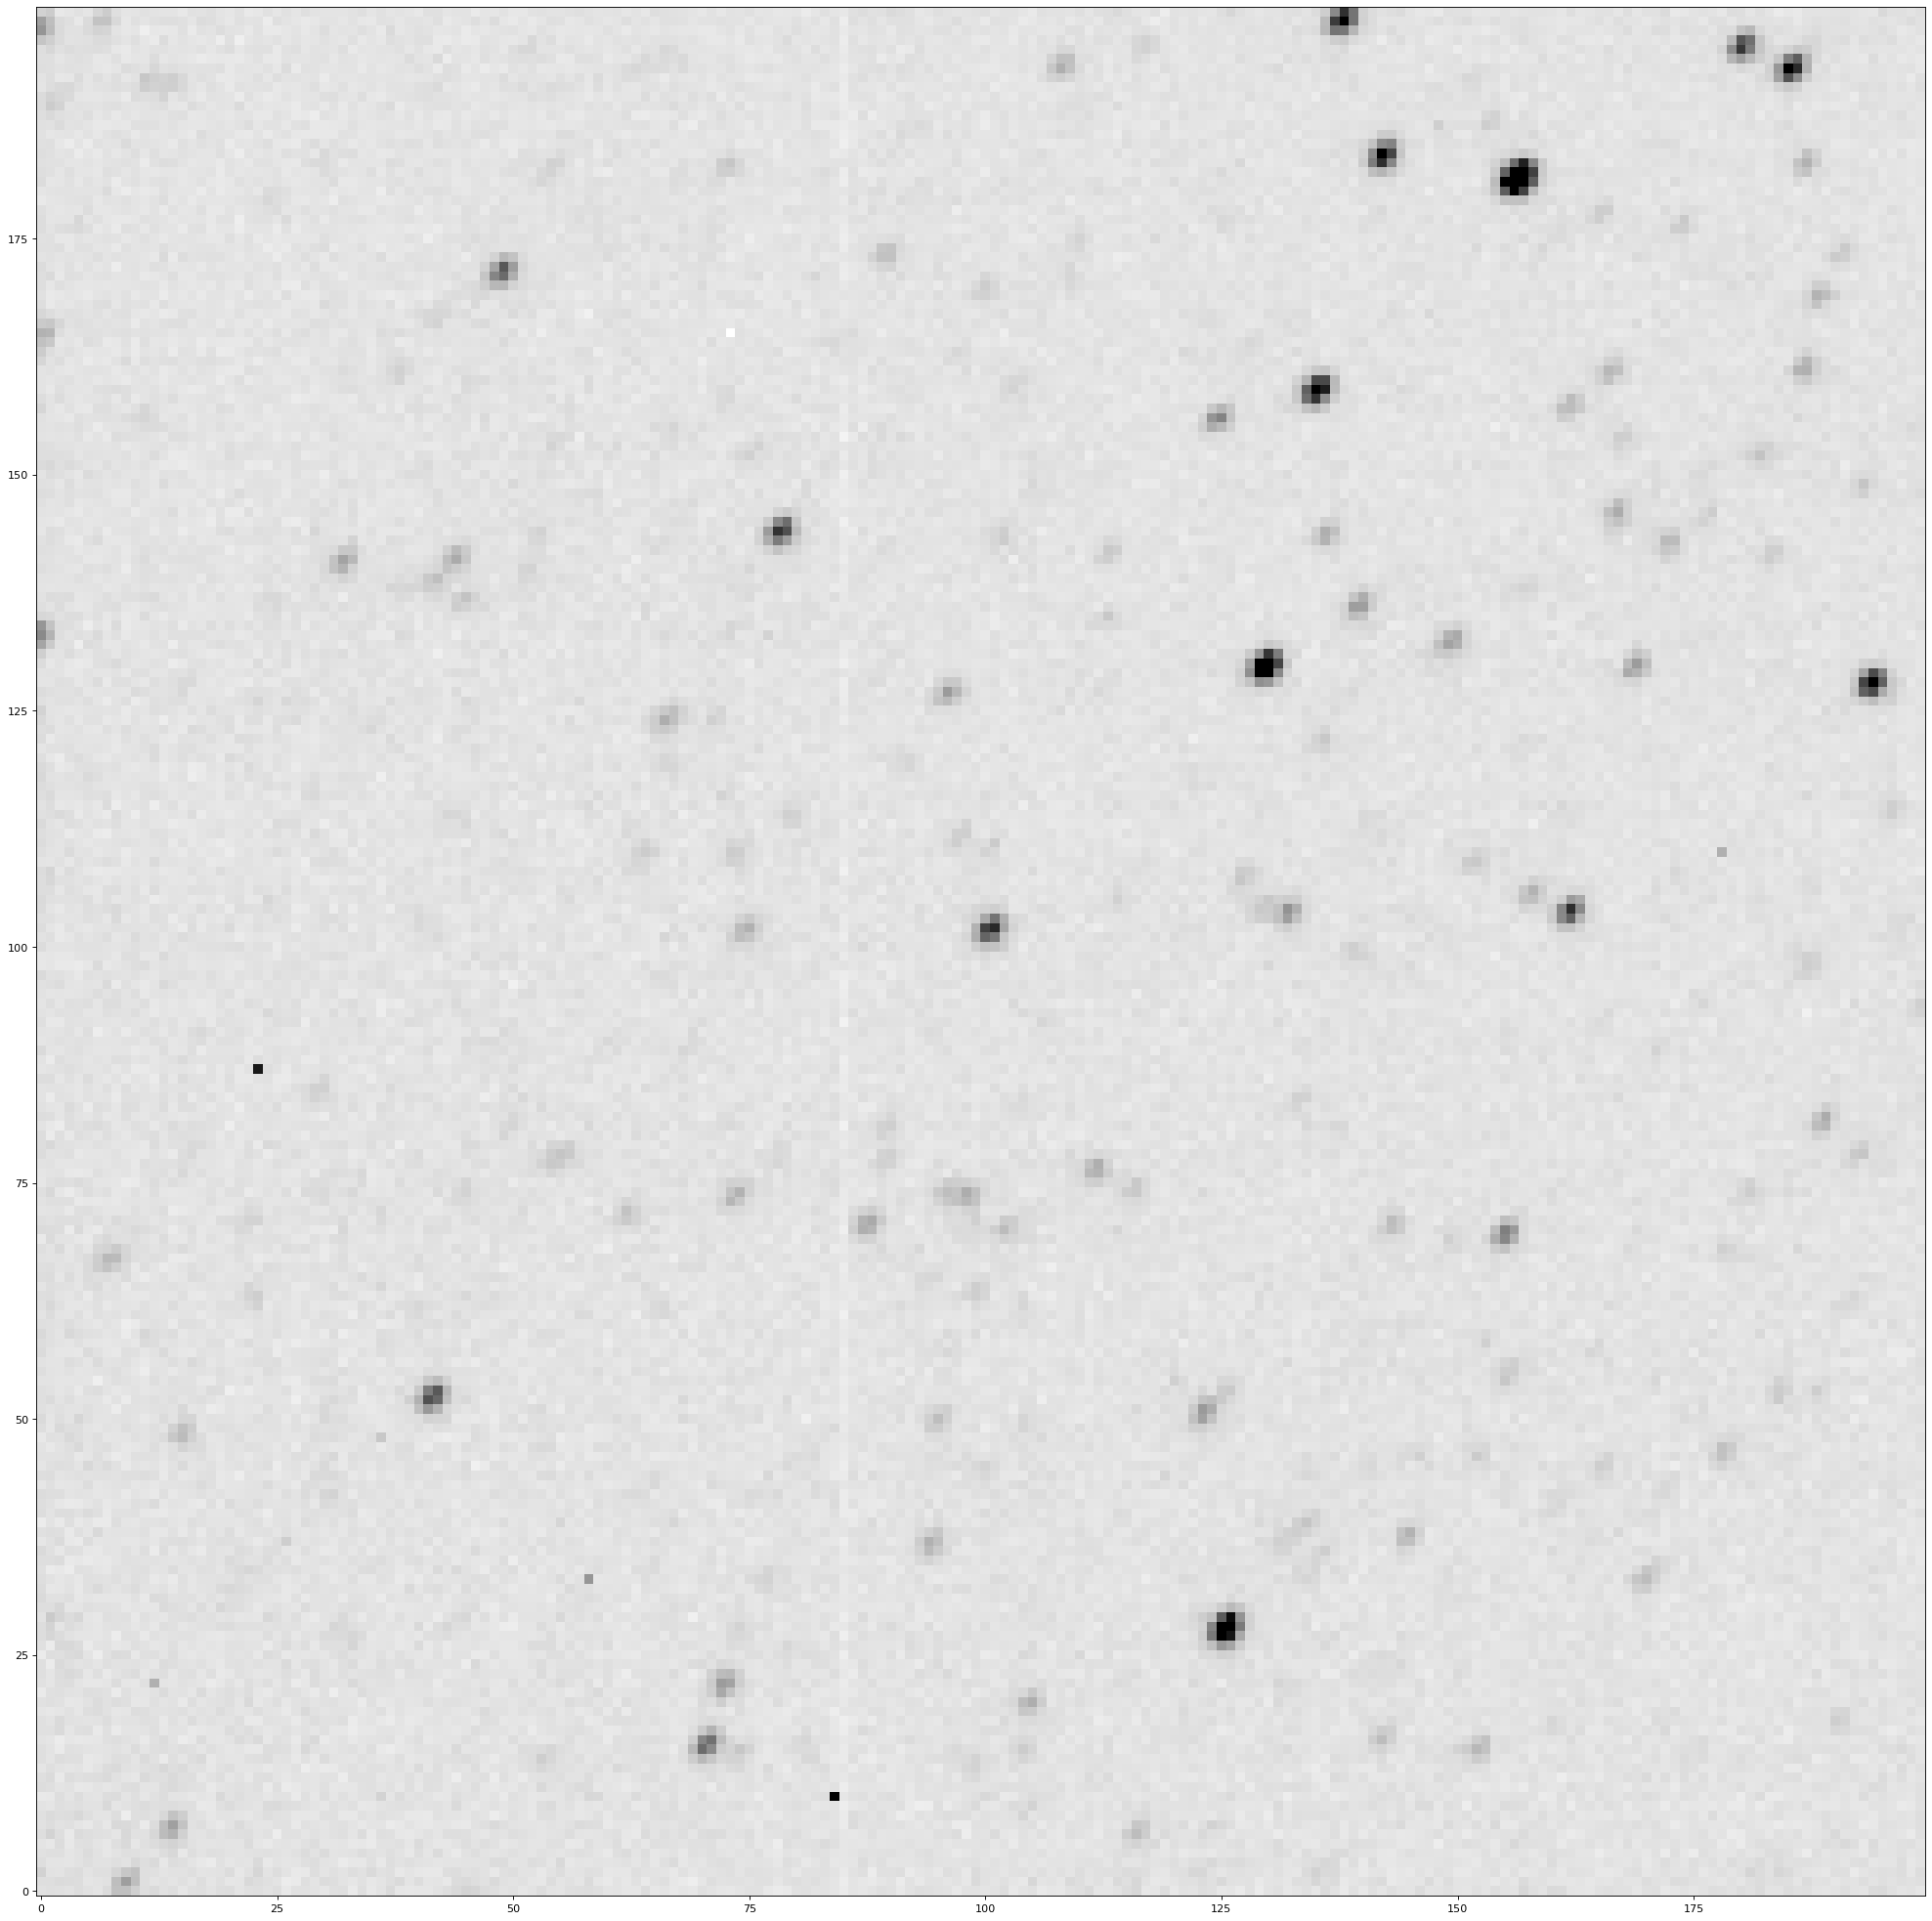

In [43]:
import glob
fits_files = [Path(f) for f in glob.glob(fitsdir+'/*.fit')]
print(f"There are {len(fits_files)} fits files")
rotations = [rotation_dict[x.name] for x in fits_files]
print(f"There are {len(rotations)} matched rotations")
hdulist = fits.open(fits_file)
data = hdulist[0].data.astype(float)
data = data.reshape(hdulist[0].header['naxis1'], hdulist[0].header['naxis2'])
print("data shape", data.shape)
fig=plt.figure(figsize=(36, 32), dpi= 80, facecolor='w', edgecolor='k')
# target_app = CircularAperture(target_xy, r=20.)    
plt.imshow(data[0:200, 0:200], cmap='gray_r', origin='lower', vmin=0, vmax=2500)

../results/WWCrA#30V_000452143_FLAT.fit


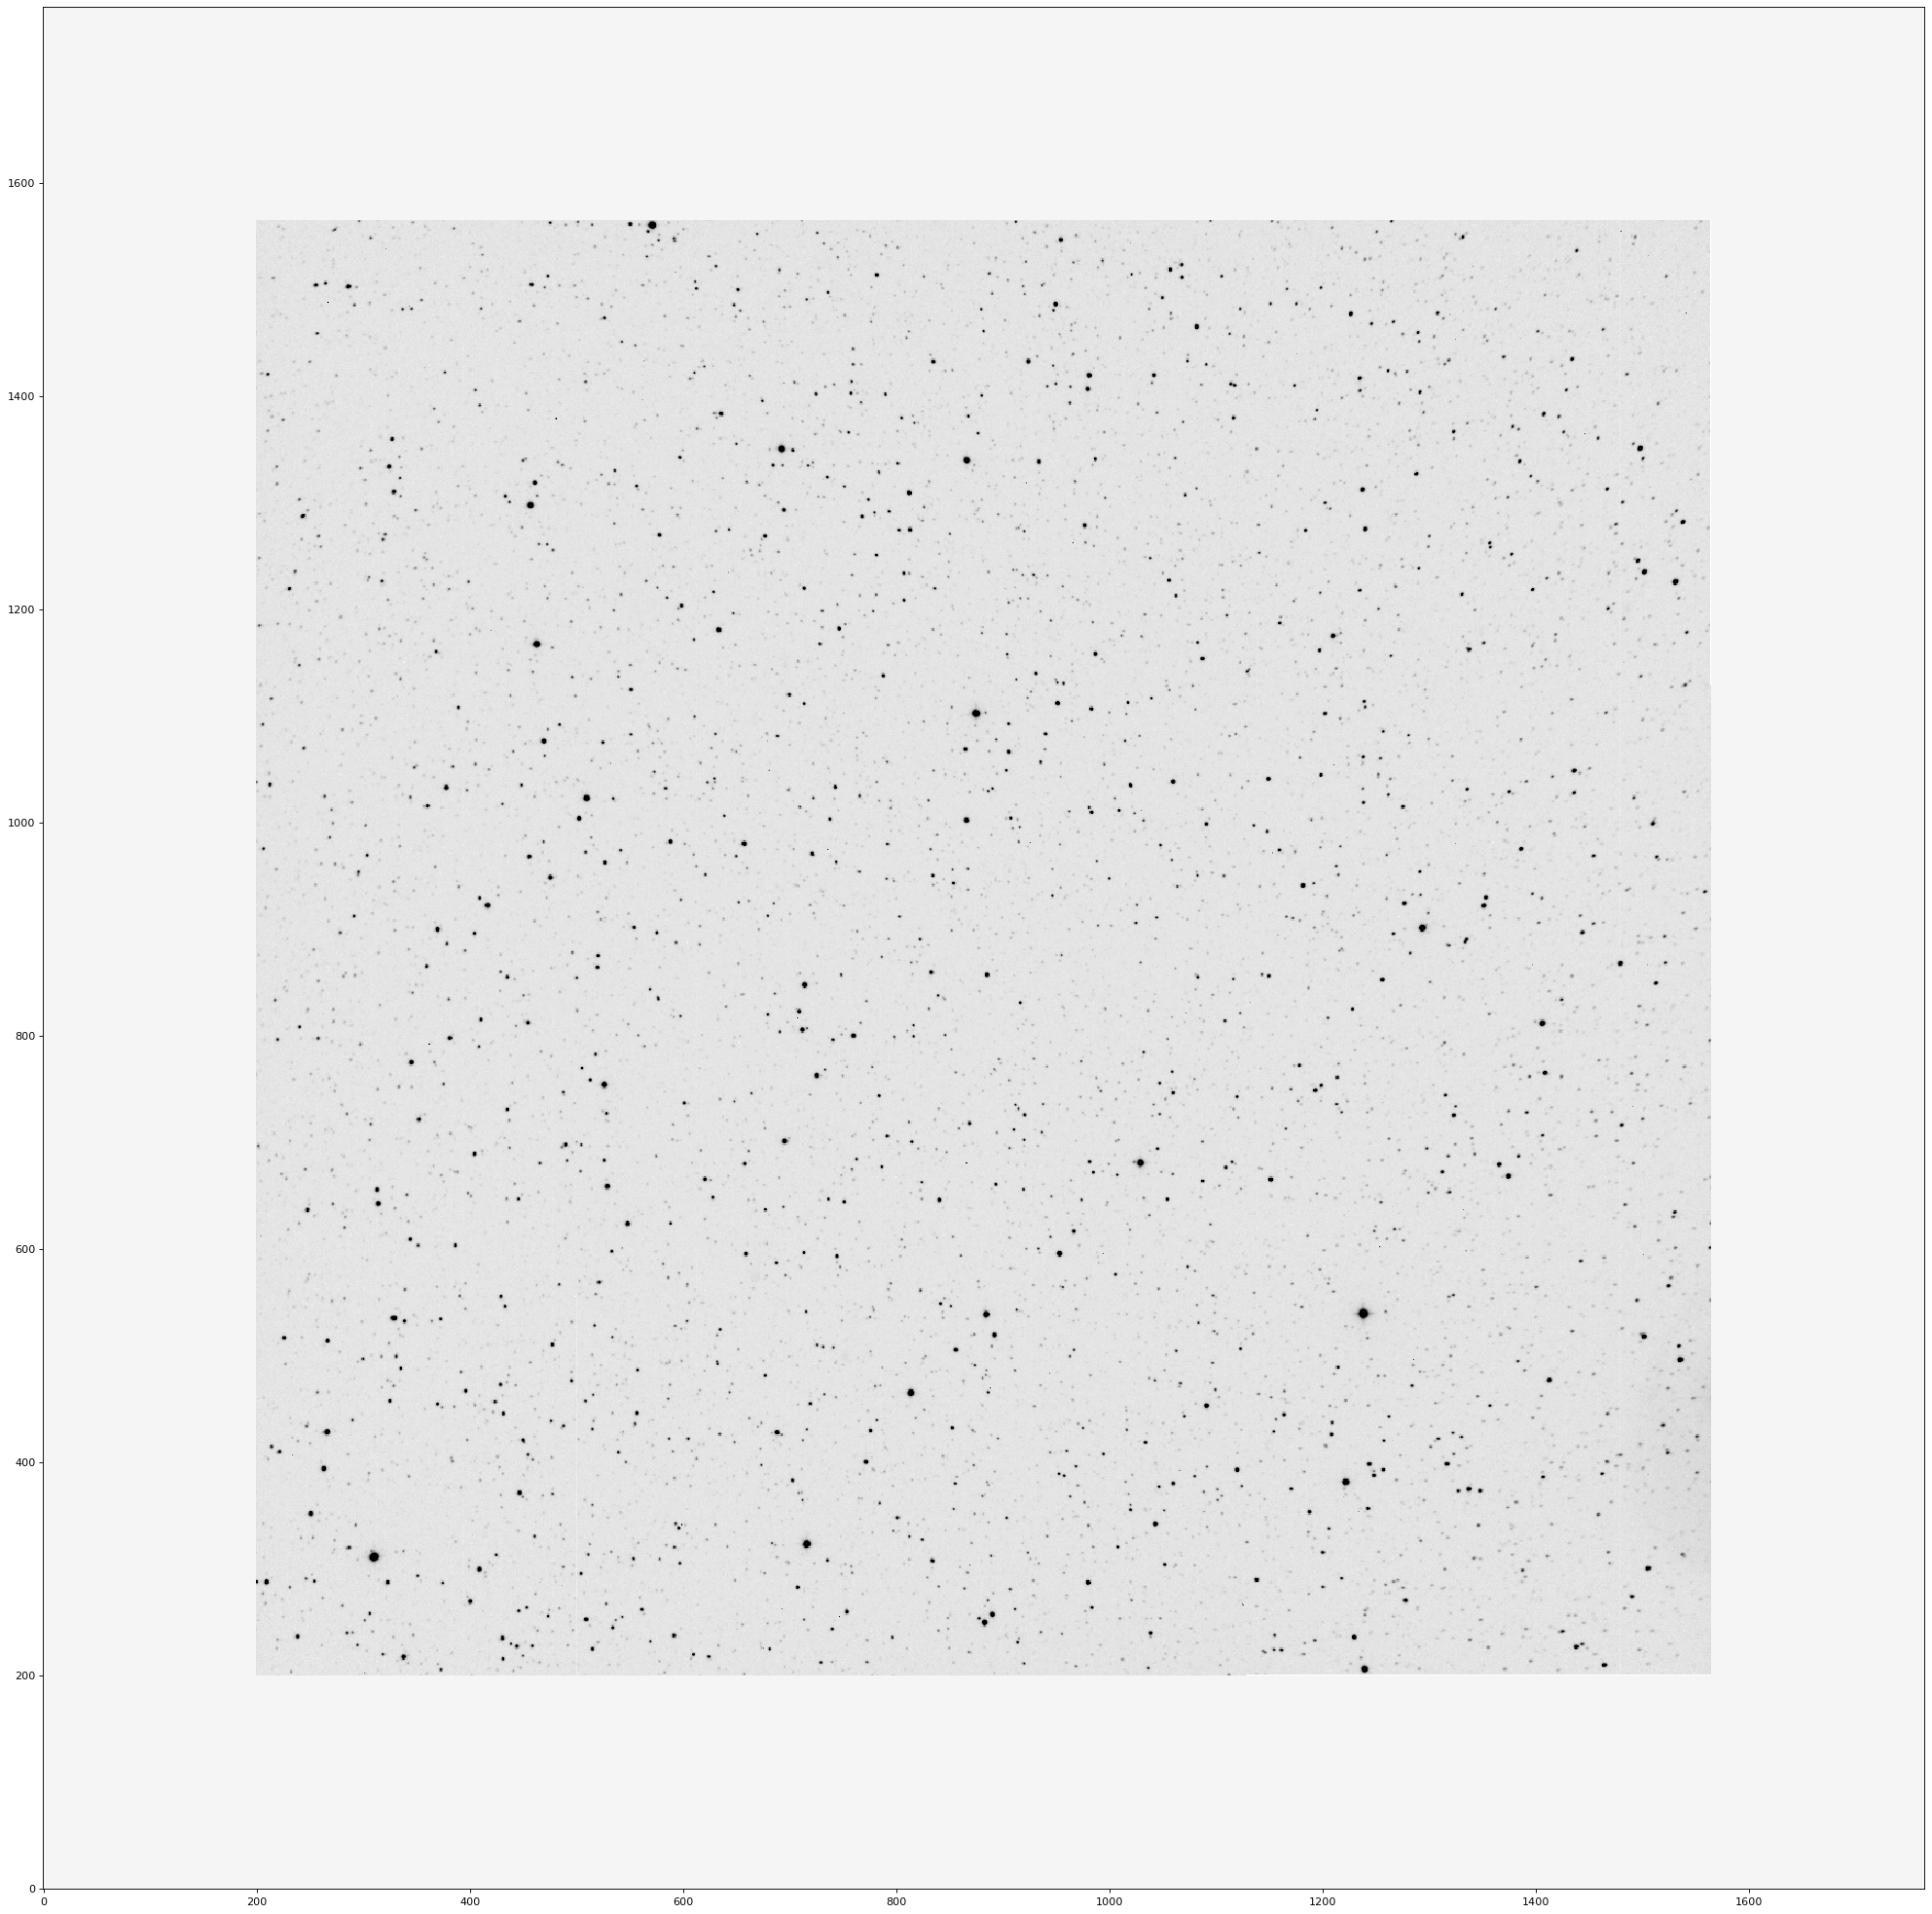

In [4]:
from scipy import ndimage

print(FITS_FILE)
hdulist = fits.open(FITS_FILE)
data = hdulist[0].data.astype(float)
data = ndimage.interpolation.rotate(data, 180)

data = np.pad(data, (PADDING,PADDING), 'constant', constant_values=(100, 100))
fig=plt.figure(figsize=(36, 32), dpi= 80, facecolor='w', edgecolor='k')
# target_app = CircularAperture(target_xy, r=20.)    
plt.imshow(data, cmap='gray_r', origin='lower', vmin=0, vmax=2500)


## Save the image

In [ ]:
fig.savefig(init.basedir+'known_vs_found_10k')
plt.close(fig)